<dl>
  <dt>Analysis</dt>
  <dd>1. Cities with latitudes closer to the equator are warmer than cities farther away from the equator.</dd>
  <dd>2. A majority of the world's cities experience wind speeds of 20 mph or less. Fewer cities experience wind speeds of 20 mph or more.</dd>
  <dd>3. Latitude does not necessarily have a big impact on the humidity of a city.</dd>
</dl>

In [122]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import time
import openweathermapy.core as owm
import csv
from citipy import citipy

In [123]:
cities = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv")
cities.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
   # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

617
['busselton', 'mataura', 'jiddah', 'sandpoint', 'cape town', 'masaurhi', 'gold coast', 'ushuaia', 'port macquarie', 'hobart', 'airai', 'saskylakh', 'luba', 'deep river', 'khatanga', 'nova olimpia', 'nikolskoye', 'xining', 'teacapan', 'korla', 'riyadh', 'biltine', 'usinsk', 'kenai', 'yerofey pavlovich', 'zhigansk', 'bluff', 'lebu', 'bethel', 'vanimo', 'kavieng', 'carnarvon', 'bengkulu', 'geraldton', 'rikitea', 'viedma', 'hithadhoo', 'barrow', 'esperance', 'touros', 'barentsburg', 'sentyabrskiy', 'thompson', 'lovozero', 'jamestown', 'derzhavinsk', 'pingliang', 'vieques', 'mogadishu', 'albany', 'gubkinskiy', 'nizhneyansk', 'atuona', 'ewa beach', 'karratha', 'kahului', 'neiafu', 'port alfred', 'keroka', 'abbeville', 'taitung', 'sibolga', 'saldanha', 'guerrero negro', 'morgan city', 'kapaa', 'dikson', 'masvingo', 'yulara', 'inirida', 'taolanaro', 'nioro', 'santiago del estero', 'fort saint john', 'adrar', 'talawdi', 'avarua', 'sunnyvale', 'nome', 'kerema', 'punta arenas', 'luena', 'dezh

In [137]:
cities_df = pd.DataFrame({'City': cities})
cities_df['Latitude']=""
cities_df['Temperature']=""
cities_df['Humidity']=""
cities_df['Cloudiness']=""
cities_df['Wind Speed']=""
cities_df.head()


,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,busselton,,,,,
1,mataura,,,,,
2,jiddah,,,,,
3,sandpoint,,,,,
4,cape town,,,,,


In [126]:
api_key = "af43b87057912e9dc99d8f938dcb4a7e"
url = "http://api.openweathermap.org/data/2.5/weather?"
settings = {"units": "imperial", "appid": api_key}

In [142]:
city_list = []
# temp = weather["main"]["temp"]
# lat = weather["coord"]['lat']
# hum = weather["main"]["humidity"]
# cloud = weather["clouds"]['all']
# wind_speed = weather["wind"]['speed']
for index, row in cities_df.iterrows():
    try:
        weather = owm.get_current(row['City'], **settings)
        cities_df.set_value(index, 'Latitude', weather["coord"]['lat'])
        cities_df.set_value(index, "Temperature", weather["main"]["temp"])
        cities_df.set_value(index, "Humidity", weather["main"]["humidity"] )
        cities_df.set_value(index, "Cloudiness", weather["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed",  weather["wind"]["speed"])
        city_list.append(row['City'])
    except:
         print(row['City'])
        
       

mataura
jiddah
masaurhi
airai
nikolskoye
barentsburg
sentyabrskiy
nizhneyansk
taolanaro
fort saint john
talawdi
haibowan
saleaula
lolua
mrirt
raudeberg
illoqqortoormiut
attawapiskat
disna
jalu
ust-kamchatsk
vaitupu
palabuhanratu
zolotinka
burica
ye
kaitangata
tubruq
avera
bac lieu
mys shmidta
hlotse
belushya guba
gat
henties bay
maykain
dzhusaly
tombouctou
tsihombe
malwan
tukrah
marzuq
himora
mocambique
galiwinku
faya
krasnoselkup
barawe
wolmaranstad
doctor pedro p. pena
alotau
ushtobe
zhezkazgan
bolungarvik
itarema
gurgan
samusu
grand centre
amapa
toliary
meyungs
jabiru
rungata
kuche
yunjinghong
soyo
sabla
hunza
marcona
skalistyy
san bartolome de tirajana
tidore
amderma


In [143]:
cities_df = cities_df[cities_df['City'].isin(city_list)]
cities_df.head()


,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,busselton,-33.65,75.45,76,44,9.98
3,sandpoint,48.28,28.4,79,1,9.17
4,cape town,-33.93,68,72,0,9.17
6,gold coast,-28,80.6,74,0,17.22
7,ushuaia,-54.8,42.8,75,40,20.8


In [148]:
cities_df.to_csv('WeatherPyData.csv') 

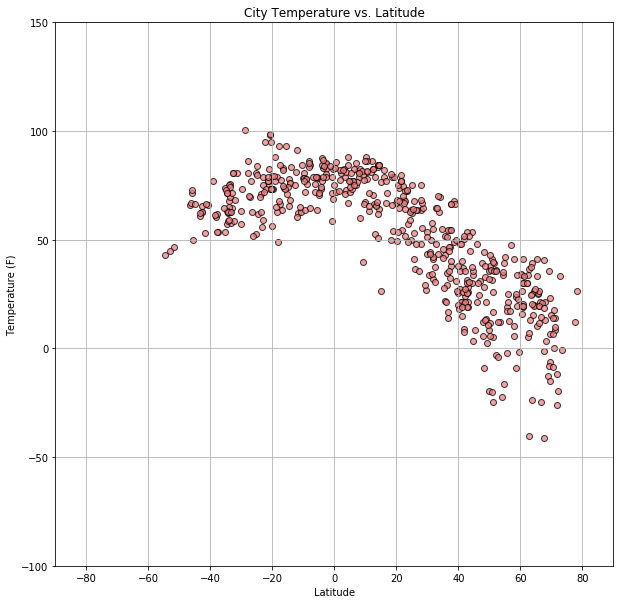

In [144]:
#Temperature (F) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Temperature'], c='lightcoral', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title('City Temperature vs. Latitude')
plt.ylim(-100, 150)
plt.xlim(-90, 90)

plt.grid()

plt.savefig('temp_lat.png')
plt.show()


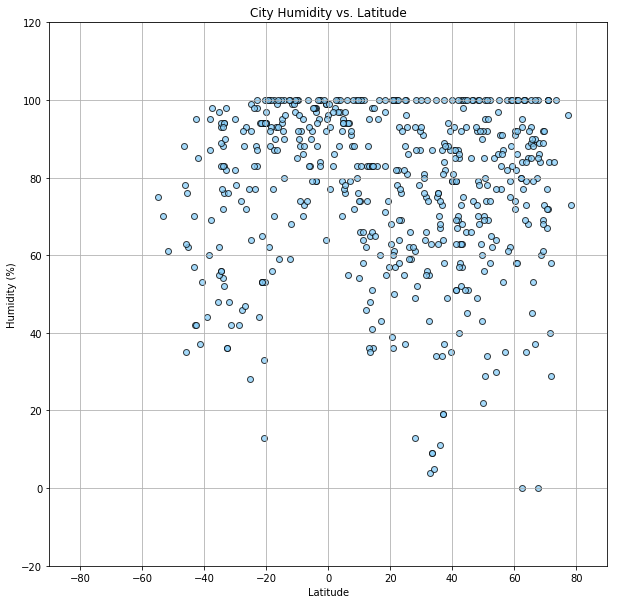

In [145]:
#Humidity (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Humidity'], c='lightskyblue', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Humidity vs. Latitude')
plt.ylim(-20, 120)
plt.xlim(-90, 90)

plt.grid()

plt.savefig('hum_lat.png')
plt.show()

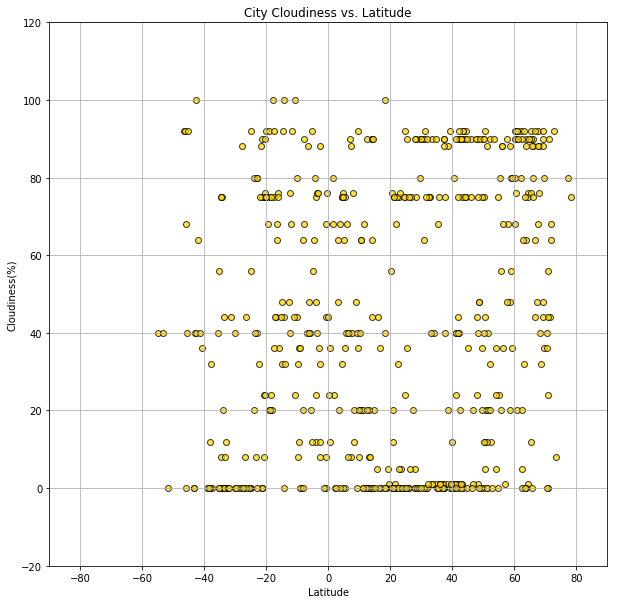

In [146]:
#Cloudiness (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Cloudiness'], c='Gold', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title('City Cloudiness vs. Latitude')
plt.ylim(-20, 120)
plt.xlim(-90, 90)

plt.grid()

plt.savefig('cloud_lat.png')
plt.show()

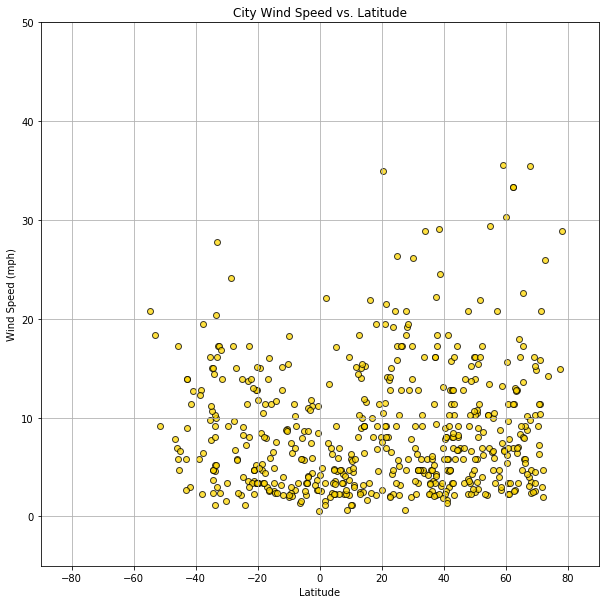

In [147]:
#Wind Speed (%) vs. Latitude
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(cities_df['Latitude'], cities_df['Wind Speed'], c='Gold', marker='o',edgecolors="black", alpha=0.75)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Wind Speed vs. Latitude')
plt.ylim(-5, 50)
plt.xlim(-90, 90)

plt.grid()

plt.savefig('wind_lat.png')
plt.show()